In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
path = r"C:\Users\USYS671257\OneDrive - WSP O365\21_31000110.002_Chattanooga TPO Model\1-ridership_survey_expansion"

df_pts = pd.read_csv(path + "/ridership_Sep_Oct_test.csv")

In [6]:
df_pts.route.values

array(['1- Alton Park', '2- North Chattanooga', '3- Enterprise South',
       '4- Hamilton Place', '5- North Brainerd', '6- East Brainerd',
       '7- Chattanooga Housing Authority', '8- Eastdale', '9- East Lake',
       '10- East Chattanooga', '13- Rossville', '14- Mocs Express',
       '15- St Elmo', '16- Northgate', '19- Cromwell Road',
       '21- Golden Gateway', '28- Amnicola'], dtype=object)

In [7]:
opts = df_pts["observed"].values
spts = df_pts["survey"].values

In [8]:
opts

array([ 676,  136,   43, 2277,   72,  112,   47,  128,  470,  924,  203,
        947,   83,  365,  102,  375,  201], dtype=int64)

In [9]:
spts

array([172,  59,  30, 528,  44,  77,   0,  57, 119, 184,  54, 224,  27,
       126,  42,  86,  55], dtype=int64)

In [10]:
delta_spts = np.zeros(spts.size)

In [12]:
ITERATIONS = 200
outputs = np.zeros((ITERATIONS, opts.size))

In [14]:
spts_ori = spts.copy()

for step in range(ITERATIONS):
    for i in range(spts.size):
        o_i = opts[i]
        s_i = spts[i]
        o_sum = np.sum(opts)
        s_sum = np.sum(spts)
                
        delta_s = max(0, (s_i*o_sum - o_i*s_sum)/(o_i-o_sum))
        
        spts[i] += delta_s 

    outputs[step] = spts

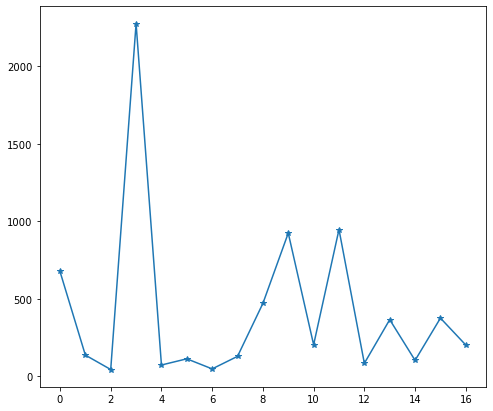

In [15]:
fig, ax = plt.subplots(1,1,figsize=(8,7))
ax.plot(np.arange(0,opts.size,1), opts, '*-')

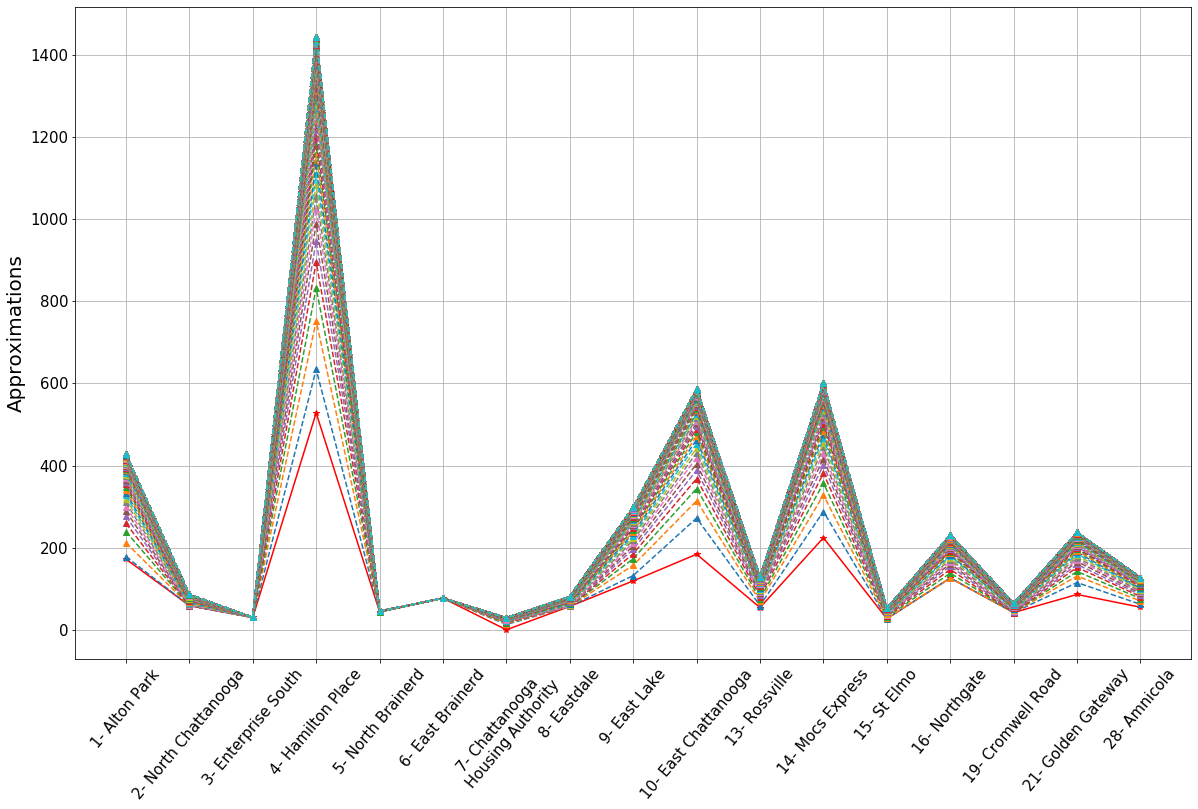

In [16]:
fig, ax = plt.subplots(1,1,figsize=(20,12))

ax.plot(np.arange(0,spts.size,1), spts_ori, '*-', color='r')
ax.set_xticks(np.arange(0,spts.size,1))
labels = df_pts.route.values
labels[6] = "7- Chattanooga \nHousing Authority"
ax.set_xticklabels(labels, rotation=50, fontsize=15)
# ax.set_yticks(fontsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.set_ylabel("Approximations", fontsize=20)

ax.grid('--')
for step in range(ITERATIONS):
    ax.plot(np.arange(0,spts.size,1), outputs[step], '^--')
    

In [17]:
opts

array([ 676,  136,   43, 2277,   72,  112,   47,  128,  470,  924,  203,
        947,   83,  365,  102,  375,  201], dtype=int64)

In [18]:
outputs[-1]

array([ 428.,   86.,   30., 1444.,   45.,   77.,   29.,   81.,  298.,
        586.,  128.,  600.,   52.,  231.,   64.,  237.,  127.])